## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

#### Importing libraries

In [20]:
import collections
import numpy as np
import random
import pickle
import collections
from matplotlib import pyplot as plt
import time

In [21]:
class Qlearning:
    # Define hyperparameters  ---write your code here
    def __init__(self, epsilon=0.2, alpha=0.3, gamma=0.9, values=[]):
        self.epsilon=epsilon
        self.alpha=alpha
        self.gamma=gamma
        self.Q = {} #Q Dictionary
        self.last_board=None
        self.q_last=0.0
        self.state_action_last=None
        self.values = values
        self.options = []

    # Reset 
    def game_begin(self):
        self.last_board = None
        self.q_last = 0.0
        self.state_action_last = None
        self.options = self.values.copy()
    
    def getQ(self, state, action): #get Q.
        if(self.Q.get((state,action))) is None:
            self.Q[(state,action)] = 1.0
        return self.Q.get((state,action))
    # esplion greedy stratergy
    def epslion_greedy(self, state, actions): #esplion greedy algorithm
        self.last_board = tuple(state)
        if(random.random() < self.epsilon):
            move = random.choice(actions) ##action
            self.state_action_last=(self.last_board,move)
            self.q_last=self.getQ(self.last_board,move)
            return move
        else: #greedy strategy
            state_list=[]
            for action in actions:
                state_list.append(self.getQ(self.last_board,action))
            maxQ=max(state_list)

            if state_list.count(maxQ) > 1:
                # more than 1 best option; choose among them randomly
                p = len(actions)
                best = [i for i in range(p) if state_list[i] == maxQ]
                i = random.choice(best)
            else:
                i = state_list.index(maxQ)
            self.state_action_last = (self.last_board, actions[i])
            self.q_last = self.getQ(self.last_board, actions[i])
            return actions[i]

    def updateQ(self, reward, state, actions): # update Q states.
        q_list=[]
        for moves in actions:
            q_list.append(self.getQ(tuple(state), moves))
        if q_list:
            max_q_next = max(q_list)
        else:
            max_q_next = 0.0
        self.Q[self.state_action_last] = self.q_last + self.alpha * ((reward + self.gamma*max_q_next) - self.q_last)

    def saveQ(self,file_name):  #save table
        with open(file_name +'.pkl', 'wb') as handle:
            pickle.dump(self.Q, handle, protocol=pickle.HIGHEST_PROTOCOL)
            print(len(self.Q.keys())) 

    def loadQ(self,file_name): # load table
        with open(file_name + '.pkl', 'rb') as handle:
            self.Q = pickle.load(handle)

In [22]:
from TC_Env import TicTacToe
game = TicTacToe() #game instance

In [23]:
player1 =  Qlearning(values=[1,3,5,7,9]) #odd for agent
player2 =  Qlearning(values=[2,4,6,8]) #

In [40]:
game.startTraining(player1,player2, 3000000, verbose=False) #train for 3,000,000 iterations.

Training Started
Training Done


In [41]:
game.saveStates()  #save Q values

9928591
5968767


In [42]:
#Q Value list
odd_player_Q, even_player_Q = game.getQ()

In [43]:
len(odd_player_Q)

9928591

In [44]:
len(even_player_Q)

5968767

In [45]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 1)]

-2.876651845579002

In [46]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 2)]

-3.61037807996936

### Epsilon - decay check

In [38]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

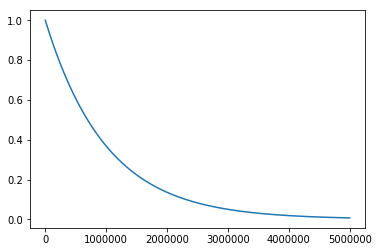

In [39]:
plt.plot(time, epsilon)
plt.show()